In [1]:
import numpy as np
import scipy.optimize
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [2]:
df = pd.read_csv('C://Users//khrf7//Desktop//466_10_bonds.csv',encoding = 'latin-1')
df

,coupon,ISIN,issue date,maturity date,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth
0,0.0150,CA135087D929,2014/10/14,2020/3/1,99.85,99.86,99.86,99.86,99.86,99.86,99.86,99.86,99.86,99.86
1,0.0075,CA135087E596,2015/4/13,2020/9/1,99.26,99.28,99.28,99.27,99.28,99.28,99.28,99.27,99.28,99.30
2,0.0075,CA135087F254,2015/10/19,2021/3/1,98.89,98.93,98.95,98.94,98.92,98.92,98.88,98.90,98.90,98.93
3,0.0075,CA135087F585,2016/4/11,2021/9/1,98.41,98.45,98.49,98.46,98.46,98.43,98.43,98.38,98.41,98.42
4,0.0050,CA135087G328,2016/10/11,2022/3/1,97.57,97.63,97.66,97.65,97.64,97.60,97.61,97.57,97.58,97.61
5,0.0275,CA135087ZU15,2011/8/2,2022/6/1,102.53,102.59,102.62,102.59,102.58,102.52,102.52,102.46,102.47,102.51
6,0.0175,CA135087H490,2017/10/6,2023/3/1,100.31,100.42,100.48,100.45,100.44,100.35,100.31,100.27,100.31,100.38
7,0.0150,CA135087A610,2012/7/30,2023/6/1,99.48,99.59,99.65,99.61,99.62,99.54,99.53,99.44,99.49,99.56
8,0.0225,CA135087J546,2018/10/5,2024/3/1,102.52,102.65,102.75,102.58,102.68,102.53,102.47,102.46,102.54,102.64
9,0.0150,CA135087J967,2019/4/5,2024/9/1,98.72,98.95,99.29,99.11,99.25,98.99,99.03,99.06,98.99,99.10


In [3]:
# a helper function to calculate the yield 
def calculate_yield(clean_price, coupon, today, maturity_date):
    today_time = datetime.strptime(today,"%Y/%m/%d")
    maturity_time = datetime.strptime(maturity_date,"%Y/%m/%d")
    difference = (maturity_time - today_time).days
    a,b = int(difference/182), difference %182
    initial = b/365
    last_payment = today_time + relativedelta(days=+b) - relativedelta(months=+6)
    dirty_price = clean_price + (today_time - last_payment).days/365 * coupon *100
    times = np.asarray([2* initial + n for n in range(0,a+1)])
    payments = np.asarray([coupon /2 * 100] * a + [coupon /2 * 100 + 100])
    F = lambda x: np.dot(payments, (1+x/2)**(-times)) - dirty_price
    return scipy.optimize.newton(F,0.02),dirty_price

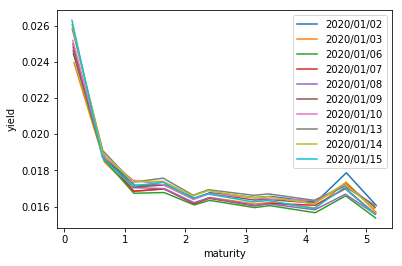

In [4]:
dates = ['2020/01/02','2020/01/03','2020/01/06','2020/01/07','2020/01/08','2020/01/09','2020/01/10',
         '2020/01/13','2020/01/14','2020/01/15']
yields = np.empty([10,11])
dirty_prices = np.empty([10,11])
for i in range(0,10):
    for j in range(0,11):
        combination = calculate_yield(float(df.iloc[j,i+4]), float(df.iloc[j,0]),dates[i],df.iloc[j,3])
        yields[i][j], dirty_prices[i][j] = combination[0],combination[1]
for i in range(0,10):
    maturities = []
    for j in range(0,11):
        maturities.append((datetime.strptime(df.iloc[j,3],"%Y/%m/%d")- datetime.strptime(dates[i],"%Y/%m/%d")).days/365)
    plt.plot(maturities, yields[i], label = dates[i])
plt.xticks(np.arange(0,6))
plt.xlabel('maturity')
plt.ylabel('yield')
plt.legend()
plt.show()

In [5]:
yields

array([[0.02442053, 0.01872334, 0.01717532, 0.01720413, 0.01646246,
        0.01676537, 0.01649739, 0.01656193, 0.01623828, 0.01786556,
        0.01605813],
       [0.02394867, 0.01846351, 0.01684621, 0.01697313, 0.0161894 ,
        0.01650316, 0.0161396 , 0.01623011, 0.01591576, 0.01734947,
        0.01567251],
       [0.02443793, 0.01860099, 0.01673561, 0.01677194, 0.01608773,
        0.01634116, 0.01594122, 0.01605102, 0.0156582 , 0.01658937,
        0.01537165],
       [0.02461315, 0.01880323, 0.01684635, 0.01697353, 0.01614994,
        0.01645449, 0.01603749, 0.01617315, 0.01607126, 0.01699469,
        0.01557703],
       [0.02479501, 0.01869458, 0.01704665, 0.01698918, 0.01621232,
        0.0164842 , 0.01606884, 0.01614367, 0.0158215 , 0.01668105,
        0.01557862],
       [0.02498389, 0.01874198, 0.01706947, 0.01719187, 0.01641971,
        0.01672405, 0.0163611 , 0.01638774, 0.01618628, 0.01726735,
        0.01594818],
       [0.02518021, 0.01878978, 0.01745028, 0.01720794, 0.

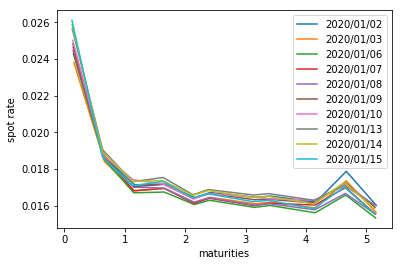

In [6]:
maturities = np.empty([10,11])
spot_rates = np.empty([10,11])
for i in range(0,10):
    for j in range(0,11):
        maturities[i][j] = (datetime.strptime(df.iloc[j,3],"%Y/%m/%d") - datetime.strptime(dates[i],"%Y/%m/%d")).days/365
        if j == 0:
            spot_rates[i][j] = -np.log(dirty_prices[i][j]/(100+ 100*float(df.iloc[j,0])/2)) /(maturities[i][j])
        else:
            if j!= 5 and j != 7:
                payments = np.asarray([100 *float(df.iloc[j,0])/2] * j + [100 + 100*float(df.iloc[j,0])/2])
            else:
                payments = np.asarray([100 *float(df.iloc[j,0])/2] * (j-1) + [100 + 100*float(df.iloc[j,0])/2])
            if j >= 1 and j <= 4:
                rate = spot_rates[i,0:j]
                time = maturities[i,0:j]
            elif j == 5:
                rate = np.asarray([(spot_rates[i][n] + spot_rates[i][n+1])/2 for n in range(0,4)])
                time = np.asarray([maturities[i][n] + 1/4 for n in range(0,4)])
            elif j == 6:
                rate = np.asarray([spot_rates[i][n] for n in range(0,5)] + [2* spot_rates[i][5] - spot_rates[i][4]])
                time = np.asarray([maturities[i][n] for n in range(0,5)] + [maturities[i][5] + 1/4])
            elif j == 7:
                rate = np.asarray([(spot_rates[i][n] + spot_rates[i][n+1])/2 for n in range(0,4)] + [spot_rates[i][5]] +\
                       [3*spot_rates[i][5] - 2*spot_rates[i][4]])
                time = np.asarray([maturities[i][n] + 1/4 for n in range(0,5)] +[maturities[i][5] + 1/2])
            elif j == 8:
                rate = np.asarray([spot_rates[i][n] for n in range(0,5)] + [2* spot_rates[i][5] - spot_rates[i][4]] +\
                                 [spot_rates[i][6]] +[2* spot_rates[i][7] - spot_rates[i][6]])
                time = np.asarray([maturities[i][n] for n in range(0,5)] +[maturities[i][5] +1/4] + [maturities[i][6]] +\
                                 [maturities[i][7] +1/4])
            elif j == 9:
                rate = np.asarray([spot_rates[i][n] for n in range(0,5)] + [2* spot_rates[i][5] - spot_rates[i][4]] +\
                                 [spot_rates[i][6]] +[2* spot_rates[i][7] - spot_rates[i][6]] + [spot_rates[i][8]])
                time = np.asarray([maturities[i][n] for n in range(0,5)] +[maturities[i][5] +1/4] + [maturities[i][6]] +\
                                 [maturities[i][7] +1/4] +[maturities[i][8]])
            else:
                rate = np.asarray([spot_rates[i][n] for n in range(0,5)] + [2* spot_rates[i][5] - spot_rates[i][4]] +\
                                 [spot_rates[i][6]] +[2* spot_rates[i][7] - spot_rates[i][6]] + [spot_rates[i][8]] +\
                                 [spot_rates[i][9]])
                time = np.asarray([maturities[i][n] for n in range(0,5)] +[maturities[i][5] +1/4] + [maturities[i][6]] +\
                                 [maturities[i][7] +1/4] +[maturities[i][8],maturities[i][9]])
            f = lambda x: np.dot(payments[0:-1], np.exp(-(np.multiply(rate,time)))) +\
                payments[-1] * np.exp(-x* maturities[i][j]) - dirty_prices[i][j]
            spot_rates[i][j] = scipy.optimize.newton(f,0.02)
    plt.plot(maturities[i],spot_rates[i],label = dates[i])
plt.xticks(np.arange(0,6))
plt.xlabel('maturities')
plt.ylabel('spot rate')
plt.legend()
plt.show()

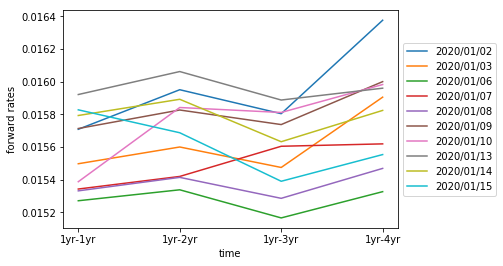

In [7]:
forward_rates = np.empty([10,4])
r = np.empty([10,5])
for i in range(0,10):
    for j in range(0,5):
        x = maturities[i, (2*j+1):(2*j+3)]
        y = spot_rates[i, (2*j+1):(2*j+3)]
        z = np.polyfit(x,y,1)
        r[i][j] = np.polyval(z,j+1)
for i in range(0,10):
    for j in range(0,4):
        forward_rates[i][j] = ((1 + r[i][j+1])**(j+2)/(1 + r[i][0]))** (1/(j+1)) -1
    plt.plot([1,2,3,4], forward_rates[i], label = dates[i])
plt.xlabel('time')
plt.ylabel('forward rates')
plt.xticks(ticks = [1,2,3,4],labels = ['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
spot_rates

array([[0.02427265, 0.01867001, 0.01713523, 0.01716861, 0.01643109,
        0.01671291, 0.01645638, 0.01651814, 0.01618948, 0.01787129,
        0.01601052],
       [0.02380642, 0.01841244, 0.0168082 , 0.0169395 , 0.01615966,
        0.01645281, 0.01609856, 0.01618677, 0.01586767, 0.01735146,
        0.01562571],
       [0.02428983, 0.01854933, 0.01669791, 0.01673886, 0.01605871,
        0.01628996, 0.01590002, 0.01600847, 0.01560741, 0.01657718,
        0.01532623],
       [0.02446293, 0.01875039, 0.01680793, 0.01693963, 0.0161202 ,
        0.01640182, 0.01599486, 0.01612919, 0.01603009, 0.01698702,
        0.01552976],
       [0.02464257, 0.01864252, 0.01700784, 0.01695496, 0.01618234,
        0.01643066, 0.01602597, 0.01609877, 0.01577111, 0.0166668 ,
        0.01553445],
       [0.02482913, 0.0186897 , 0.01703056, 0.01715727, 0.01638904,
        0.01667193, 0.01631916, 0.01634222, 0.01614041, 0.01726067,
        0.01590388],
       [0.02502302, 0.01873729, 0.01740998, 0.01717231, 0.

In [9]:
forward_rates

array([[0.0157084 , 0.01595044, 0.01580385, 0.01637546],
       [0.01549766, 0.01560008, 0.01547484, 0.01590494],
       [0.01527124, 0.01533823, 0.01516621, 0.01532682],
       [0.01534292, 0.01541995, 0.01560455, 0.01561916],
       [0.01533179, 0.01541425, 0.01528601, 0.01546912],
       [0.01571306, 0.01582638, 0.01573724, 0.01599988],
       [0.0153877 , 0.01584163, 0.01581126, 0.0159822 ],
       [0.01592104, 0.01606161, 0.01588737, 0.01595981],
       [0.01579273, 0.01589191, 0.01563232, 0.01582385],
       [0.01582742, 0.0156872 , 0.01539041, 0.01555373]])

In [10]:
yield_matrix = np.empty([10,5])
for i in range(0,10):
    for j in range(0,5):
        x = maturities[i, (2*j+1):(2*j+3)]
        y = yields[i, (2*j+1):(2*j+3)]
        z = np.polyfit(x,y,1)
        yield_matrix[i][j] = np.polyval(z,j+1)
X = np.empty([5,9])
for i in range(0,5):
    a = yield_matrix[1:10,i] 
    b = yield_matrix[0:9,i]
    X[i,:] = np.log(a / b)
log_return_covariance = np.cov(X)
forward_covariance = np.cov(forward_rates.T)

In [11]:
log_return_covariance

array([[1.10832346e-04, 5.72306569e-05, 9.69163048e-05, 1.08397304e-04,
        1.19596891e-04],
       [5.72306569e-05, 1.03644186e-04, 1.16682227e-04, 1.27081895e-04,
        1.51295888e-04],
       [9.69163048e-05, 1.16682227e-04, 1.54721660e-04, 1.77403730e-04,
        2.08917884e-04],
       [1.08397304e-04, 1.27081895e-04, 1.77403730e-04, 2.68573515e-04,
        2.81414707e-04],
       [1.19596891e-04, 1.51295888e-04, 2.08917884e-04, 2.81414707e-04,
        3.40667751e-04]])

In [12]:
forward_covariance

array([[5.70965786e-08, 4.88864736e-08, 3.08673862e-08, 3.62839710e-08],
       [4.88864736e-08, 6.30381988e-08, 5.21841629e-08, 6.29494114e-08],
       [3.08673862e-08, 5.21841629e-08, 5.89758244e-08, 6.41162965e-08],
       [3.62839710e-08, 6.29494114e-08, 6.41162965e-08, 9.64594354e-08]])

In [13]:
w1,v1 = np.linalg.eig(log_return_covariance)
w1,v1

(array([8.48617389e-04, 6.41662387e-05, 4.33060806e-05, 2.92760812e-06,
        1.94221422e-05]),
 array([[ 0.25697219,  0.90093295,  0.23824289,  0.24855216,  0.06121491],
        [ 0.30180924, -0.01648586, -0.7461073 ,  0.52901724, -0.268522  ],
        [ 0.41089448,  0.20760075, -0.39722824, -0.79382245, -0.01110376],
        [ 0.53989384, -0.23015102,  0.46133029, -0.00227438, -0.66536782],
        [ 0.6185118 , -0.30328284,  0.12628665,  0.16793844,  0.69376584]]))

In [14]:
w2,v2 = np.linalg.eig(forward_covariance)
w2,v2

(array([2.21871403e-07, 3.96398139e-08, 3.08017261e-09, 1.09786475e-08]),
 array([[ 0.37518619,  0.79077557,  0.43446179,  0.21249064],
        [ 0.5128161 ,  0.2447851 , -0.80500474, -0.17049127],
        [ 0.47500049, -0.23733206,  0.38977664, -0.75241092],
        [ 0.60879348, -0.50835789,  0.10622852,  0.59971514]]))